# The Curse of Dimensionality
The curse of dimensionality refers to various problems that arise when working with high-dimensional data.

## Living in a High-Dimensional Space
We are so used to living in three dimensions that our intuition fails when we try to imagine things in high-dimensional spaces. Many things behave very differently in high-dimensional spaces.

For example, if we pick a random point in a unit square (a square whose side length is 1), its probability of being located less than $0.01$ from the border of the square is less than $2\%$. This is because the area of the unit square is 1, whereas the area of the inner square with side length $0.99$ is $0.99 \times 0.99 = 0.9801$. Therefore, the probability that the point falls inside the area between the inner square and the unit square is $1 - 0.9801 = 0.0199$.

On the other hand, if we pick a random point in a unit hypercube with 1000 dimensions, its probability of being located less than 0.01 from the border of the hypercube is greater than $99.99\%$! The reason is that the volume of the unit hypercube is $1^{1000} = 1$, while the volume of the inner hypercube with side length of $0.99$ is $0.99^{1000} = 0.00004317$. Therefore, the probability that the point falls inside the volume between the inner hypercube and the unit hypercube is $1 - 0.00004317 = 0.99995683$.

This means that high-dimensional spaces are very sparse, i.e., most of the data points lie very close to the border of the surface, and thus are very far from each other.

## Nearest Neighbor Search
This effect complicates nearest neighbor search in high-dimensional spaces, since the nearest neighbors in these spaces are not very near!

Consider $k$-nearest neighbors in a data set of $n$ points that are uniformly distributed inside a $d$-dimensional unit hypercube. Let the $k$-neighborhood of a point be the smallest hypercube that contains its $k$-nearest neighbors, and let $l$ be the average side length of such a neighborhood. Then the volume of the neighborhood (that contains $k$ points) is $l^d$, while the volume of the unit hypercube (that contains $n$ points) is 1. Therefore, on average $l^d = \frac{k}{n}$, or:

$$l = \left(\frac{k}{n}\right)^{\frac{1}{d}}$$

In other words, the average side length of a $k$-neighborhood increases exponentially as the number of dimensions grows (note that the number in the brackets is smaller than 1). The following graph shows the length of the average neighborhood for 10-nearest neighbors in a unit hypercube with $1,000,000$ points, as a function of the number of dimensions:

<div style="align:center">
    <img src="media/pca_dims.png" width=500>
</div>

In three dimensions, the average neighborhood has $l = 0.021$ (only a small fraction of the unit cube), while in 500 dimensions, it is $97.7\%$!

Similarly, when a distance measure such as Euclidean distance is used in a high-dimensional space, there is little difference in the distances between different pairs of points. This is because the ratio between the nearest and farthest points approaches 1, i.e., the points essentially become uniformly distant from each other.

## How does it Affect Machine Learning?
Machine learning algorithms that are based on nearest neighbor search (such as KNN) or on distance measures (such as K-means) suffer from the curse of dimensionality due to the effects mentioned above.

Moreover, as the number of dimensions increases, the amount of data we need to generalize accurately grows exponentially. With a fixed number of training samples, the predictive power of the model first increases as the number of features (dimensions) goes up, but beyond a certain of number of features it starts to deteriorate.

Other issues related to high-dimensionality data are:
- Training the model takes more time.
- The data requires more storage space.
- Interpretation and visualization become much harder in high-dimensional spaces.

## Solution: Dimensionality Reduction
In order to deal with the curse of dimensionality, we need to reduce the number of dimensions. There are two main methods to do so:
1. **Feature selection,** i.e., select only a subset of the original features to build the model. Feature selection methods are less effective in data sets with a large number of features (such as images).
2. Use a **dimensionality reduction** technique such as Principal Component Analysis (PCA). PCA projects the data into a lower-dimensional space that captures the largest amount of variation in the data (i.e., preserves as much information as possible).

<div style="align:center">
    <img src="media/pca_shift.png" width=800>
</div>

# Principal Component Analysis (PCA)
<hr>

Principal Component Analysis (PCA) is a powerful unsupervised learning algorithm used primarily for dimensionality reduction and visualization. In scenarios where datasets contain many features (dimensions) that make visualization challenging, PCA assists by compressing these features into fewer dimensions, ensuring the original data's essence remains intact.

## Why PCA?
- **Visualizing High-dimensional Data:** If your dataset comprises numerous features, such as 10, 50, or even thousands, visualizing it becomes a formidable task. PCA provides an elegant solution by reducing these features to just two or three, enabling easy plotting and visualization. PCA is often used to visualize high-dimensional data in 2D or 3D. For instance, PCA is used to visualize the MNIST dataset, which comprises 784 features (dimensions), in 2D or 3D.
- **Understanding Data Structure:** By projecting the data into a lower-dimensional space, PCA can often reveal hidden structures or patterns that might be harder to discern in the higher-dimensional space.

> **Less Frequently Used Applications**
> - PCA is often used to speed up machine learning algorithms by reducing the number of features. For instance, PCA is used to reduce the number of features in the MNIST dataset from 784 to 154 while preserving 95% of the variance.
> - PCA can be used to filter out noise from datasets. For instance, PCA is used to remove noise from images.

<div style="align:center">
    <img src="media/2to1.png" width="700">
</div>


## PCA Algorithm
PCA is a linear dimensionality reduction technique that seeks to maximize the variance of the projected data. The algorithm works by identifying the hyperplane that lies closest to the data and then projecting the data onto it.


## Choosing the Hyperplane (Axis of Projection or Principal Component)
Consider the following data points in 2D space that we wish to project onto a single dimension. The red line represents the hyperplane that lies closest to the data.

<div style="align:center">
    <img src="media/axis1.png" width="700">
</div>

> This is not a bad choice, but it is not the best choice either. The hyperplane should be chosen such that it preserves the maximum amount of variance.

In this case, the `hyperplane` or `principal component` is the line that passes through the origin and bisects the data, maximizing the variance of the projected data. The `principal component` is the direction along which the data varies the most. The `second principal component` is the direction orthogonal to the first principal component that accounts for the next highest variance, and so on.

<div style="align:center">
    <img src="media/axis2.png" width="500">
</div>

> This is the worst choice of hyperplane as it squishes the data points together, resulting in a loss of variance.

<div style="align:center">
    <img src="media/axis3.png" width="600">
</div>

> This is the best choice of hyperplane as it preserves the maximum amount of variance.

## Projection onto the Hyperplane
Once the hyperplane is chosen, the data is projected onto it. The distance of each data point from the hyperplane is called the `projection` or `loading` of the data point onto the hyperplane. The projection is the dot product of the data point and the unit vector along the hyperplane. The unit vector is the vector that has a magnitude of 1 and points in the direction of the hyperplane. For instance, $(x_1, x_2) = (2, 3)$ and the hyperplane $y = x$, the projection is the dot product of the data point and the unit vector (0.707, 0.707) along the hyperplane.

$$ \text{Projection} = (2, 3) \cdot (0.707, 0.707) = 3.535 $$


## Reconstruction of the Data
The projected data can be reconstructed by reversing the process. The projected data is multiplied by the unit vector along the hyperplane and added to the mean of the original data. The result is the reconstructed data point. Notice that the reconstructed data point is not the same as the original data point but a close approximation.

$$ \text{Reconstruction} = \text{Projection} \cdot \text{Unit Vector} + \text{Mean} $$

$$ (2, 3) \approx 3.535 \cdot (0.707, 0.707) + (0, 0) = (2.52, 2.52) $$

## PCA is not Linear Regression
PCA is often confused with linear regression. However, the two are very different. Linear regression is a supervised learning algorithm that seeks to minimize the error between the predicted and actual values. PCA is an unsupervised learning algorithm that seeks to maximize the variance of the projected data. PCA is not used for prediction but for visualization and dimensionality reduction.

<div style="align:center">
    <img src="media/PCA.vs.LR.png" width="700">
</div>


## PCA in Scikit-learn
1. Optional pre-processing: Perform feature scaling to standardize the dataset's features onto unit scale (mean = 0 and variance = 1) to ensure the PCA algorithm's effectiveness.
2. "fit" the PCA algorithm to the data to obtain 2 (or 3) new axes (principal components) that maximize the variance of the projected data.
3. Optionally examine how much variance (information) each principal component captures. This is often referred to as the explained variance ratio.
4. Transform the original data onto the new axes.

To demonstrate the curse of dimensionality, we will run a $K$-nearest neighbor search to classify 1000 random images from the MNIST data set. This data set contains 70,000 images of handwritten digits, and the goal is to classify these images into one of the ten digits (0 - 9). Each image is $28 \times 28$ pixels in size, i.e., the number of dimensions is 784.

We will first use all the features (pixels in this case), and then we will see whether we can improve the results by reducing the number of dimensions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [3]:
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False, parser='auto')

In [4]:
# scale inputs to range [0, 1] instead of [0, 255]
X = X / 255

In [5]:
# pick a random subset of 1,000 samples from the data set
random_subset = np.random.choice(range(len(X)), size=1000)
X_sample = X[random_subset]
y_sample = y[random_subset]

In [6]:
# split these samples into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=0)

In [7]:
# default n_neighbors=5
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
print('Accuracy on training set:', knn.score(X_train, y_train))
print('Accuracy on test set:', knn.score(X_test, y_test))

Accuracy on training set: 0.91125
Accuracy on test set: 0.89


Let's now use PCA from Scikit-Learn to reduce the number of dimensions from 784 down to 50.

In [9]:
pca = PCA(n_components=50)

In [10]:
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [11]:
knn.fit(X_train_reduced, y_train)

KNeighborsClassifier()

In [12]:
print('Accuracy on training set:', knn.score(X_train_reduced, y_train))
print('Accuracy on test set:', knn.score(X_test_reduced, y_test))

Accuracy on training set: 0.91375
Accuracy on test set: 0.9


In [13]:
# dimensions from 10 to 700 in intervals of 10
dimensions = range(10, 701, 10)
scores = []

for n_dimensions in dimensions:
    pca = PCA(n_components=n_dimensions)
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)
    knn.fit(X_train_reduced, y_train)
    score = knn.score(X_test_reduced, y_test)
    scores.append(score)

Text(0, 0.5, 'Test accuracy')

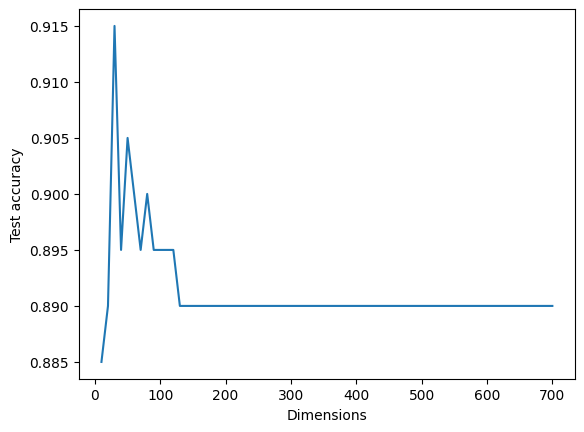

In [14]:
plt.plot(dimensions, scores)
plt.xlabel('Dimensions')
plt.ylabel('Test accuracy')